# Analyze on 30-34 yrs old married women group


In [1]:
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import gmaps
import folium

warnings.simplefilter('ignore')

data_df = pd.read_csv("married_female_30-34_all.csv")

In [2]:
data_df1 = data_df[['latitude', 'longitude']].to_numpy()

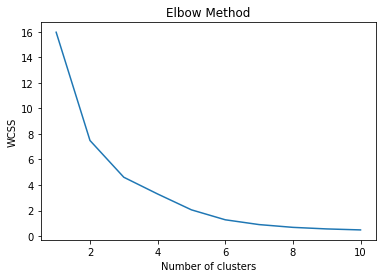

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

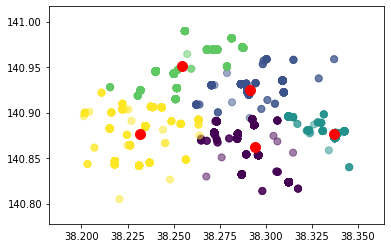

In [4]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_df1)
plt.scatter(data_df1[:,0], data_df1[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

In [5]:
kmeans.cluster_centers_

array([[ 38.29396733, 140.8619291 ],
       [ 38.29123679, 140.92538186],
       [ 38.33697111, 140.87673243],
       [ 38.25442   , 140.9511463 ],
       [ 38.23165756, 140.87626551]])

In [6]:
data_df['cluster'] = pred_y

In [7]:
data_df

datatime day_type     period           device   latitude  \
0     2019-03-01 19:29:04  Weekday      Night  126.141.218.254  38.338242   
1     2019-03-01 19:08:51  Weekday      Night  126.141.218.254  38.338234   
2     2019-03-01 19:21:51  Weekday      Night  126.141.218.254  38.338242   
3     2019-03-01 02:02:33  Weekday   Sleeping  101.128.205.253  38.271999   
4     2019-03-01 19:41:31  Weekday      Night  126.141.218.254  38.338333   
5     2019-03-01 16:10:44  Weekday    Evening   126.224.82.110  38.338737   
6     2019-03-01 16:09:33  Weekday    Evening   126.224.82.110  38.338737   
7     2019-03-01 19:41:13  Weekday      Night  126.141.218.254  38.338333   
8     2019-03-01 16:18:31  Weekday    Evening   126.224.82.110  38.339043   
9     2019-03-01 19:35:43  Weekday      Night  126.141.218.254  38.338272   
10    2019-03-01 19:44:03  Weekday      Night  126.141.218.254  38.338333   
11    2019-03-01 16:10:26  Weekday    Evening   126.224.82.110  38.338737   
12    2019-03-01 19:47:09  Weekday      Night  126.141.218.254  38.338333   
13    2019-03-01 19:45:35  Weekday      Night  126.141.218.254  38.338333   
14    2019-03-01 16:08:26  Weekday    Evening   126.224.82.110  38.338737   
15    2019-03-01 19:16:53  Weekday      Night  126.141.218.254  38.338242   
16    2019-03-01 16:08:42  Weekday    Evening   126.224.82.110  38.338737   
17    2019-03-01 20:26:06  Weekday      Night    114.16.73.229  38.271999   
18    2019-03-01 18:54:09  Weekday      Night  126.141.218.254  38.338135   
19    2019-03-01 19:11:02  Weekday      Night  126.141.218.254  38.338242   
20    2019-03-01 19:03:00  Weekday      Night  126.141.218.254  38.338234   
21    2019-03-01 19:13:11  Weekday      Night  126.141.218.254  38.338242   
22    2019-03-01 19:31:40  Weekday      Night  126.141.218.254  38.338272   
23    2019-03-01 06:14:31  Weekday    Morning       42.147.9.0  38.300877   
24    2019-03-01 19:24:57  Weekday      Night    106.166.15.24  38.271999   
25    2019-03-01 18:46:06  Weekday      Night  126.141.218.254  38.337666   
26    2019-03-01 19:56:23  Weekday      Night  126.141.218.254  38.337666   
27    2019-03-01 18:44:39  Weekday      Night     115.163.62.0  38.306469   
28    2019-03-01 19:32:36  Weekday      Night  126.141.218.254  38.338272   
29    2019-03-01 19:24:58  Weekday      Night  126.141.218.254  38.338242   
...                   ...      ...        ...              ...        ...   
8270  2019-03-03 21:01:30  Weekend      Night   175.135.205.41  38.293701   
8271  2019-03-03 21:35:13  Weekend      Night   175.135.205.41  38.293701   
8272  2019-03-03 22:03:26  Weekend   MidNight   175.135.205.41  38.293701   
8273  2019-03-03 21:12:23  Weekend      Night     36.3.153.163  38.256104   
8274  2019-03-03 21:14:24  Weekend      Night     36.3.153.163  38.256104   
8275  2019-03-03 22:13:13  Weekend   MidNight   175.135.205.41  38.293701   
8276  2019-03-03 20:59:02  Weekend      Night   175.135.205.41  38.293701   
8277  2019-03-03 21:21:25  Weekend      Night   175.135.205.41  38.293701   
8278  2019-03-03 22:11:13  Weekend   MidNight   175.135.205.41  38.293701   
8279  2019-03-03 21:52:38  Weekend      Night   175.135.205.41  38.293701   
8280  2019-03-03 21:06:46  Weekend      Night   175.135.205.41  38.293701   
8281  2019-03-03 20:50:31  Weekend      Night   175.135.205.41  38.293701   
8282  2019-03-03 20:57:43  Weekend      Night   175.135.205.41  38.293701   
8283  2019-03-03 21:15:21  Weekend      Night   175.135.205.41  38.293701   
8284  2019-03-03 21:42:42  Weekend      Night   175.135.205.41  38.293701   
8285  2019-03-03 21:09:49  Weekend      Night   175.135.205.41  38.293701   
8286  2019-03-03 20:42:32  Weekend      Night   175.135.205.41  38.293701   
8287  2019-03-03 22:13:29  Weekend   MidNight   175.135.205.41  38.293701   
8288  2019-03-03 21:11:39  Weekend      Night     36.3.153.163  38.256104   
8289  2019-03-03 20:07:56  Weekend      Night   175.135.205.41  38.293701   
8290  2019-03

# Group 1

In [8]:
data_group1 = data_df[data_df['cluster']==0]
data_group1.groupby(['category_id1']).size()

category_id1
Entertainment, Anime/Manga                           6
Games, game genres                                   1
Games,game apps                                      4
Gourmet, food information, cooking                 618
Health/Beauty/Cosmetics, Health                      1
Hobbies, art                                       575
Internet service                                     2
Life                                                 9
Mobile/Smartphone                                    5
SNS, social networking                               5
Travel, transportation, means of transportation      1
dtype: int64

In [9]:
locationlist = data_group1[["latitude","longitude"]].values.tolist()
labels = data_group1["cluster"].values.tolist()

m = folium.Map(location=kmeans.cluster_centers_[0].tolist(), zoom_start=13)
for point in range(len(locationlist)):
    folium.Marker(locationlist[point], icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)
    
folium.Marker(kmeans.cluster_centers_[0].tolist(),popup = data_group1.groupby(['category_id1']).size().idxmax()
, icon=folium.Icon(color='green',icon='info-sign')).add_to(m)

m

# Group2 

In [10]:
data_group2 = data_df[data_df['cluster']==1]
data_group2.groupby(['category_id1']).size()

category_id1
Games, game genres                    3775
Games,game apps                          4
Gourmet, food information, cooking     221
Hobbies, Photography/Camera             11
Life stage, childbirth/childcare        42
dtype: int64

In [11]:
locationlist = data_group2[["latitude","longitude"]].values.tolist()
labels = data_group2["cluster"].values.tolist()

m = folium.Map(location=kmeans.cluster_centers_[1].tolist(), zoom_start=13)
for point in range(len(locationlist)):
    folium.Marker(locationlist[point], icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)
    
folium.Marker(kmeans.cluster_centers_[1].tolist(),popup = data_group2.groupby(['category_id1']).size().idxmax()
, icon=folium.Icon(color='green',icon='info-sign')).add_to(m)

m

# Group3

In [12]:
data_group3 = data_df[data_df['cluster']==2]
data_group3.groupby(['category_id1']).size()

category_id1
Entertainment, Music                     7
Games, game genres                    1588
Gourmet, food information, cooking     117
SNS,twitter                              2
dtype: int64

In [13]:
locationlist = data_group3[["latitude","longitude"]].values.tolist()
labels = data_group3["cluster"].values.tolist()

m = folium.Map(location=kmeans.cluster_centers_[2].tolist(), zoom_start=13)
for point in range(len(locationlist)):
    folium.Marker(locationlist[point], icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)
    
folium.Marker(kmeans.cluster_centers_[2].tolist(),popup = data_group3.groupby(['category_id1']).size().idxmax()
, icon=folium.Icon(color='green',icon='info-sign')).add_to(m)

m

# Group4

In [14]:
data_group4 = data_df[data_df['cluster']==3]
data_group4.groupby(['category_id1']).size()

category_id1
Entertainment                               5
Entertainment, Anime/Manga                 21
Games, game genres                        144
Gourmet, food information, cooking        488
Hobbies, Photography/Camera                 5
Hobbies, art                               64
Internet service, URL transfer service      1
Life                                        5
Life stage, childbirth/childcare           20
Mobile/Smartphone                           1
dtype: int64

In [15]:
locationlist = data_group4[["latitude","longitude"]].values.tolist()
labels = data_group4["cluster"].values.tolist()

m = folium.Map(location=kmeans.cluster_centers_[3].tolist(), zoom_start=13)
for point in range(len(locationlist)):
    folium.Marker(locationlist[point], icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)
    
folium.Marker(kmeans.cluster_centers_[3].tolist(),popup = data_group4.groupby(['category_id1']).size().idxmax()
, icon=folium.Icon(color='green',icon='info-sign')).add_to(m)

m

# Group5

In [16]:
data_group5 = data_df[data_df['cluster']==4]
data_group5.groupby(['category_id1']).size()

category_id1
Entertainment, Movies                      1
Entertainment, Music                       1
Games, game genres                        25
Games,game apps                            4
Gourmet, food information, cooking       499
Health/Beauty/Cosmetics, Fitness club      1
Hobbies, art                               5
Life                                       9
Life stage, childbirth/childcare           2
Life stage, romance                        5
dtype: int64

In [17]:
locationlist = data_group5[["latitude","longitude"]].values.tolist()
labels = data_group5["cluster"].values.tolist()

m = folium.Map(location=kmeans.cluster_centers_[4].tolist(), zoom_start=13)
for point in range(len(locationlist)):
    folium.Marker(locationlist[point], icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)
    
folium.Marker(kmeans.cluster_centers_[4].tolist(),popup = data_group4.groupby(['category_id1']).size().idxmax()
, icon=folium.Icon(color='green',icon='info-sign')).add_to(m)

m